<a href="https://colab.research.google.com/github/jeongseobshin/Medical-AI/blob/main/report_pyramid_enhance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(765, 1220)


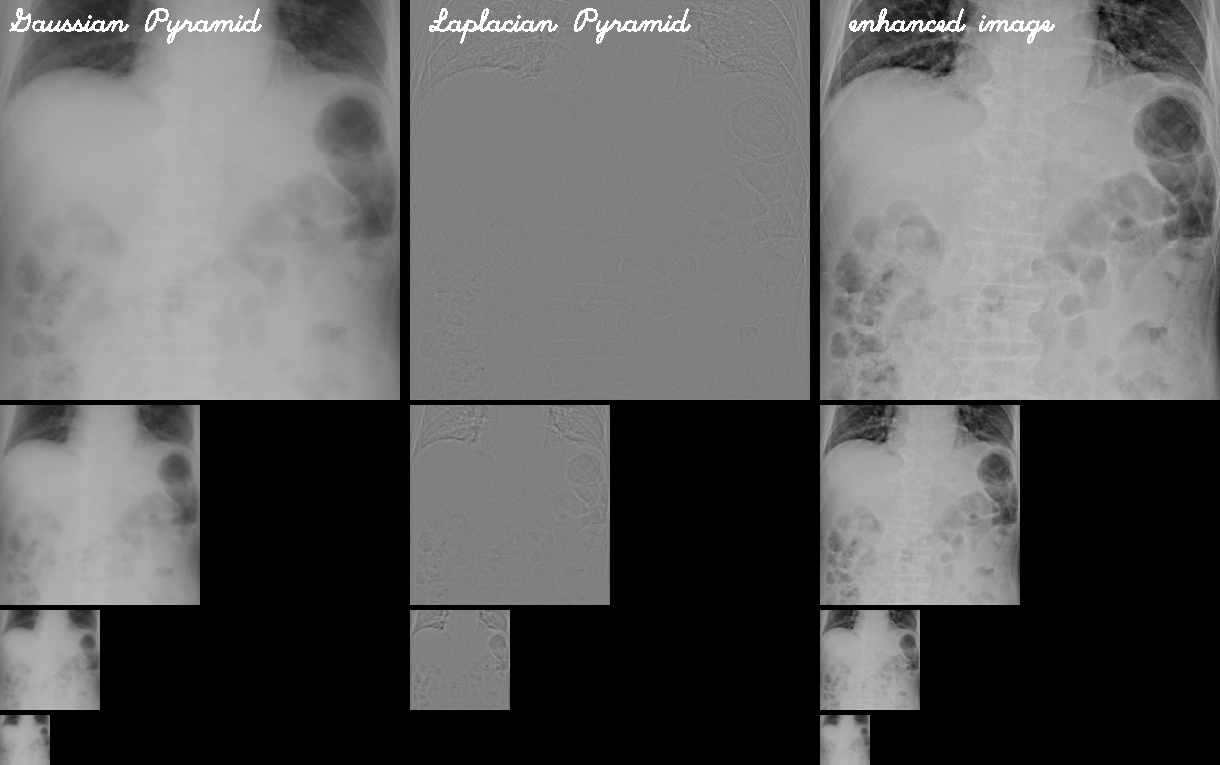

In [11]:
'''
1) R0 = I0
2) D0, D1, D2에 곱하기 2 혹은 3을 하고
   R3, R2, R1, R0를 만들어 나간다.
   최종 R0는 I0의 enhance image가 된다.
'''

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/python/data/의료영상데이타/abdomen.bmp',cv2.IMREAD_GRAYSCALE)

#gaussian pyramid
I0 = np.float32(image)
w0 = I0.shape[0]
h0 = I0.shape[1]

I1 = cv2.pyrDown(I0)
w1 = I1.shape[0]
h1 = I1.shape[1]

I2 = cv2.pyrDown(I1)
w2 = I2.shape[0]
h2 = I2.shape[1]

I3 = cv2.pyrDown(I2)
w3 = I3.shape[0]
h3 = I3.shape[1]

#Laplacian pyramid
lap1 = cv2.pyrUp(I1)
lap2 = cv2.pyrUp(I2)
lap3 = cv2.pyrUp(I3)

D0 = image - lap1
D1 = I1 - lap2
D2 = I2 - lap3

a = 3

D0 = a * D0
D0d = np.uint(D0 + 128)
w01 = D0d.shape[0]
h01 = D0d.shape[1]
D0d = np.clip(D0d, 0, 255)

D1 = a * D1
D1d = np.uint8(D1 + 128)
w11 = D1d.shape[0]
h11 = D1d.shape[1]
D1d = np.clip(D1d, 0, 255)

D2 = a * D2
D2d = np.uint8(D2 + 128)
w21 = D2d.shape[0]
h21 = D2d.shape[1]
D2d = np.clip(D2d, 0, 255)

#result
R3 = I3
w32 = R3.shape[0]
h32 = R3.shape[1]
R3 = np.clip(R3, 0, 255)

R3u = cv2.pyrUp(R3)
R2 = R3u + D2
w22 = R2.shape[0]
h22 = R2.shape[1]
R2 = np.clip(R2, 0, 255)

R2u = cv2.pyrUp(R2)
R1 = R2u + D1
w12 = R1.shape[0]
h12 = R1.shape[1]
R1 = np.clip(R1, 0, 255)

R1u = cv2.pyrUp(R1)
R0 = R1u + D0
w02 = R0.shape[0]
h02 = R0.shape[1]
R0 = np.clip(R0, 0, 255)


#영상 띄우기
w = w0 + w01 + w02 + 20
h = h0 + h1 + h2 + h3 + 15
all = np.zeros((h,w), np.uint8)
print(all.shape)

all[0:w0, 0:h0] = I0
all[w0+5:w0+w1+5, 0:h1] = I1
all[w0+w1+10:w0+w1+w2+10, 0:h2] = I2
all[w0+w1+w2+15:w0+w1+w2+w3+15, 0:h3] = I3

all[0:w01, h0+10:h0+h01+10] = D0d
all[w01+5:w01+w11+5, h0+10:h0+h11+10] = D1d
all[w01+w11+10:w01+w11+w21+10, h0+10:h0+h21+10] = D2d

all[0:w02, h0+h01+20:h0+h01+h02+20] = R0
all[w02+5:w02+w12+5, h0+h01+20:h0+h01+h12+20] = R1
all[w02+w12+10:w0+w12+w22+10, h0+h01+20:h0+h01+h22+20] = R2
all[w02+w12+w22+15:w02+w12+w22+w32+15, h0+h01+20:h0+h01+h32+20] = R3


cv2.putText(all, 'Gaussian Pyramid', (10,30), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (255,255,255), 2)
cv2.putText(all, 'Laplacian Pyramid', (430,30), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (255,255,255), 2)
cv2.putText(all, 'enhanced image', (850,30), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (255,255,255), 2)

cv2_imshow(all)